In [ ]:
# Libraries and presets
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the dataset
ticker = '^GSPC'
df = yf.download(ticker)
df = df.xs(ticker, level='Ticker', axis=1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Trading rules

x_last_day = 5
trading_days = 7

df['Entry_signal'] = np.where(df.index.month != pd.Series(df.index.month).shift(1), 1, 0)
df.dropna(axis=0, inplace=True)
df['Entry_signal'] = df['Entry_signal'].shift(-x_last_day).replace(np.nan, 0).replace(0, np.nan)
df['Exit_signal'] = df['Entry_signal'].shift(trading_days).replace(np.nan, 0).replace(0, np.nan)

In [ ]:
# Filtering only the signals to calculate returns
df = df.dropna(subset = ['Entry_signal', 'Exit_signal'], axis=0, how='all')

# Checking if there is no open trade without closing
if df['Entry_signal'].sum() > df['Exit_signal'].sum():
  df.drop(df.index[-1], inplace=True)

In [ ]:
# Calculating trade returns
df['Trade'] = df['Close'].pct_change(1)
df['Acc_trade'] = df['Trade'].cumsum() * 100

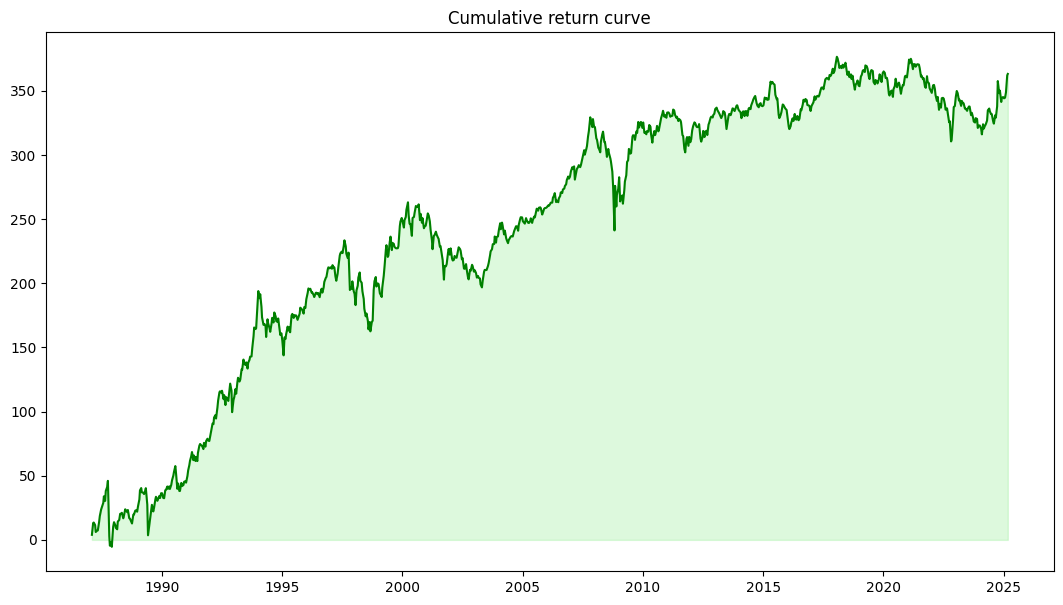

In [ ]:
# Plotting the cumulative return curve
plt.figure(figsize=(13,7))
plt.plot(df['Acc_trade'], color='green')
plt.fill_between(df.index, df['Acc_trade'], alpha=0.3, color='lightgreen')
plt.title('Cumulative return curve')
plt.show()